# AEROMMA and UFS-AQM: Read Paired Data and Create Plots

Our first example will demonstrate the basics available in MELODIES MONET to compare the UFS-AQM model results against AEROMMA aircraft observations (https://csl.noaa.gov/projects/aeromma/) for ozone, nitrogen oxide (NO), nitrogen dioxide (NO2), and carbon monoxide (CO).

This example reads in the AEROMMA and UFS-AQM paired data created by the scripts here on Hera (/scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/submit_jobs). This includes analysis over 4 flights and 2 days with a resampling of 30 s.

First, we import the melodies_monet.driver module.

In [1]:
from melodies_monet import driver

## Analysis driver class

Now, lets create an instance of the analysis driver class, melodies_monet.driver.analysis. It consists of these main parts:

* model instances

* observation instances

* a paired instance of both

In [2]:
an = driver.analysis()

Initially, most of our analysis object’s attributes are set to None, though some have meaningful defaults:

In [3]:
an

analysis(
    control='control.yaml',
    control_dict=None,
    models={},
    obs={},
    paired={},
    start_time=None,
    end_time=None,
    time_intervals=None,
    download_maps=True,
    output_dir=None,
    output_dir_save=None,
    output_dir_read=None,
    debug=False,
    save=None,
    read=None,
)

## Control file

We set the YAML control file and begin by reading the file.

In [4]:
control_fn='/scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/jupyter_notebooks/control_read_looped_aircraft_AEROMMA_UFS_AQM.yaml'
an.control=control_fn
an.read_control() 
an.control_dict  

{'analysis': {'start_time': '2023-06-27-00:00:00',
  'end_time': '2023-06-28-23:59:00',
  'output_dir': '/scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/processed/submit_plots',
  'debug': True,
  'read': {'paired': {'method': 'netcdf',
    'filenames': {'aeromma_ufsaqm': ['/scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/processed/submit/0627_L1_aeromma_ufsaqm.nc4',
      '/scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/processed/submit/0627_L2_aeromma_ufsaqm.nc4',
      '/scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/processed/submit/0628_L1_aeromma_ufsaqm.nc4']}}}},
 'model': {'ufsaqm': {'files': '/scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/UFS-AQM/cmaq54_OriRave1/aqm.20230627/12/aqm.t12z.dyn.f001.nc',
   'mod_type': 'rrfs',
   'radius_of_influence': 19500,
   'mapping': {'aeromma': {'no2_ave': 'NO2_LIF',
     'no_ave': 'NO_LIF',
     'o3_ave': 'O3_CL',
     'co': 'CO_LGR'}},
   'variables': {'pres_pa_mid': {'rename': 'pressure_model',
     'unit_scale': 1,
     'unit_scale_method': '*'},
    

Now, some of our analysis object’s attributes are populated:

In [5]:
an

analysis(
    control='/scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/jupyter_notebooks/control_read_looped_aircraft_AEROMMA_UFS_AQM.yaml',
    control_dict=...,
    models={},
    obs={},
    paired={},
    start_time=Timestamp('2023-06-27 00:00:00'),
    end_time=Timestamp('2023-06-28 23:59:00'),
    time_intervals=None,
    download_maps=True,
    output_dir='/scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/processed/submit_plots',
    output_dir_save='/scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/processed/submit_plots',
    output_dir_read='/scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/processed/submit_plots',
    debug=True,
    save=None,
    read={'paired': {'method': 'netcdf', 'filenames': {'aeromma_ufsaqm': ['/scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/processed/submit/0627_L1_aeromma_ufsaqm.nc4', '/scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/processed/submit/0627_L2_aeromma_ufsaqm.nc4', '/scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/processed/submit/0628_L1_aeromma_ufsaqm.nc4']}}},


## Load the model data

The driver will automatically loop through the “models” found in the model section of the YAML file and create an instance of melodies_monet.driver.model for each that includes the

* label

* mapping information

* file names (can be expressed using a glob expression)

* xarray object

In [6]:
an.open_models()

rrfs
/scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/UFS-AQM/cmaq54_OriRave1/aqm.20230627/12/aqm.t12z.dyn.f001.nc
**** Reading RRFS-CMAQ model output...


Applying open_models() populates the models attribute.

In [7]:
an.models

{'ufsaqm': model(
     model='rrfs',
     radius_of_influence=19500,
     mod_kwargs={'var_list': ['co', 'no_ave', 'o3_ave', 'no2_ave', 'lat', 'lon', 'phalf', 'tmp', 'pressfc', 'dpres', 'hgtsfc', 'delz']},
     file_str='/scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/UFS-AQM/cmaq54_OriRave1/aqm.20230627/12/aqm.t12z.dyn.f001.nc',
     label='ufsaqm',
     obj=...,
     mapping={'aeromma': {'no2_ave': 'NO2_LIF', 'no_ave': 'NO_LIF', 'o3_ave': 'O3_CL', 'co': 'CO_LGR'}},
     label='ufsaqm',
     ...
 )}

We can access the underlying dataset with the obj attribute.

In [8]:
an.models['ufsaqm'].obj

<xarray.Dataset> Size: 880MB
Dimensions:         (time: 1, z: 64, y: 488, x: 775)
Coordinates:
    latitude        (y, x) float64 3MB dask.array<chunksize=(488, 775), meta=np.ndarray>
    longitude       (y, x) float64 3MB dask.array<chunksize=(488, 775), meta=np.ndarray>
  * time            (time) datetime64[ns] 8B 2023-06-27T13:00:00
Dimensions without coordinates: z, y, x
Data variables:
    co              (time, z, y, x) float32 97MB dask.array<chunksize=(1, 64, 488, 775), meta=np.ndarray>
    no_ave          (time, z, y, x) float32 97MB dask.array<chunksize=(1, 64, 488, 775), meta=np.ndarray>
    o3_ave          (time, z, y, x) float32 97MB dask.array<chunksize=(1, 64, 488, 775), meta=np.ndarray>
    no2_ave         (time, z, y, x) float32 97MB dask.array<chunksize=(1, 64, 488, 775), meta=np.ndarray>
    temp_model      (time, z, y, x) float32 97MB dask.array<chunksize=(1, 64, 488, 775), meta=np.ndarray>
    surfpres_pa     (time, y, x) float32 2MB dask.array<chunksize=(1, 488, 775), meta=np.ndarray>
    dp_pa           (time, z, y, x) float32 97MB dask.array<chunksize=(1, 64, 488, 775), meta=np.ndarray>
    surfalt_m       (time, y, x) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    dz_m            (time, z, y, x) float32 97MB 47.32 47.32 ... 8.865e+03
    pressure_model  (time, z, y, x) float32 97MB 1.008e+05 1.008e+05 ... 37.92
    alt_msl_m_full  (time, z, y, x) float32 97MB -47.32 -47.32 ... -6.142e+04
Attributes: (12/15)
    ak:           [2.0000000e+01 6.4247002e+01 1.3778999e+02 2.2195799e+02 3....
    bk:           [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0....
    cen_lat:      50.0
    cen_lon:      -118.0
    dlat:         0.11690814
    dlon:         0.11690814
    ...           ...
    lat1:         -28.5
    lat2:         28.5
    lon1:         -45.25
    lon2:         45.25
    ncnsto:       202
    source:       FV3GFS

## Load the observational data

As with the model data, the driver will loop through the “observations” found in the obs section of the YAML file and create an instance of melodies_monet.driver.observation for each.

In [9]:
an.open_obs()

In [10]:
an.obs

{'aeromma': observation(
     obs='aeromma',
     label='aeromma',
     file='/scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/obs_short/short_AEROMMA-Merge_20230627_L1_20240410_1459.csv',
     obj=...,
     type='pt_src',
     type=None,
     variable_dict={'O3_CL': {'unit_scale': 1, 'unit_scale_method': '*', 'nan_value': -7777, 'LLOD_value': -8888, 'LLOD_setvalue': 0.0, 'ylabel_plot': 'O3 (ppbv)'}, 'NO_LIF': {'unit_scale': 1000.0, 'unit_scale_method': '/', 'nan_value': -7777, 'LLOD_value': -8888, 'LLOD_setvalue': 0.0, 'ylabel_plot': 'NO (ppbv)'}, 'NO2_LIF': {'unit_scale': 1000.0, 'unit_scale_method': '/', 'nan_value': -7777, 'LLOD_value': -8888, 'LLOD_setvalue': 0.0, 'ylabel_plot': 'NO2 (ppbv)'}, 'CO_LGR': {'nan_value': -7777, 'LLOD_value': -8888, 'LLOD_setvalue': 0.0, 'ylabel_plot': 'CO (ppbv)'}, 'Time_Start': {'rename': 'time'}, 'pressure_obs': {'rename': 'pressure_obs', 'unit_scale': 100, 'unit_scale_method': '*'}, 'temp_obs': {'rename': 'temp_obs', 'unit_scale': 1, 'unit_scale_method

In [11]:
an.obs['aeromma'].obj

<xarray.Dataset> Size: 14kB
Dimensions:       (time: 173)
Coordinates:
  * time          (time) datetime64[ns] 1kB 2023-06-27T16:09:00 ... 2023-06-2...
Data variables:
    CO_LGR        (time) float64 1kB 143.8 143.0 138.4 ... 141.8 140.9 140.4
    pressure_obs  (time) float64 1kB 9.025e+04 8.86e+04 ... 9.171e+04 9.246e+04
    temp_obs      (time) float64 1kB 293.5 292.1 290.8 ... 295.6 297.4 298.0
    latitude      (time) float64 1kB 34.63 34.63 34.65 ... 34.6 34.61 34.62
    longitude     (time) float64 1kB -118.1 -118.1 -118.2 ... -118.1 -118.1
    altitude      (time) float64 1kB 982.2 1.143e+03 1.303e+03 ... 857.9 799.8
    NO_LIF        (time) float64 1kB 0.2573 0.3002 0.2095 ... 0.2122 0.1891
    NO2_LIF       (time) float64 1kB nan nan nan nan ... 0.876 0.6945 0.5946
    O3_CL         (time) float64 1kB 56.09 56.16 57.02 ... 62.91 63.3 63.07

## Read in the Paired Output Netcdf File

We read in the AEROMMA and UFS-AQM paired data created by the scripts here on Hera (/scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/submit_jobs). This includes analysis over 4 flights and 2 days with a resampling of 30 s.

In [12]:
an.read_analysis()

Reading: /scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/processed/submit/0627_L1_aeromma_ufsaqm.nc4
Reading: /scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/processed/submit/0627_L2_aeromma_ufsaqm.nc4
Reading: /scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/processed/submit/0628_L1_aeromma_ufsaqm.nc4


In [13]:
an.paired

{'aeromma_ufsaqm': pair(
     type='aircraft',
     radius_of_influence=None,
     obs='aeromma',
     model='ufsaqm',
     model_vars=['no2_ave', 'no_ave', 'o3_ave', 'co'],
     obs_vars=['NO2_LIF', 'NO_LIF', 'O3_CL', 'CO_LGR'],
     filename='aeromma_ufsaqm.nc',
 )}

## Plot

The plotting() routine produces plots.

Value of fill after reading from scatter_density_config: True
Saving scatter density plot to /scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/processed/submit_plots/plot_grp4.scatter_density.NO2_LIF.2023-06-27_00.2023-06-28_23.all.Los Angeles_aeromma_vs_ufsaqm.png...
Processing scatter density plot for model 'ufsaqm' and observation 'aeromma'...
Saving scatter density plot to /scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/processed/submit_plots/plot_grp4.scatter_density.NO2_LIF.2023-06-27_00.2023-06-28_23.all.Los Angeles_aeromma_vs_ufsaqm.png...


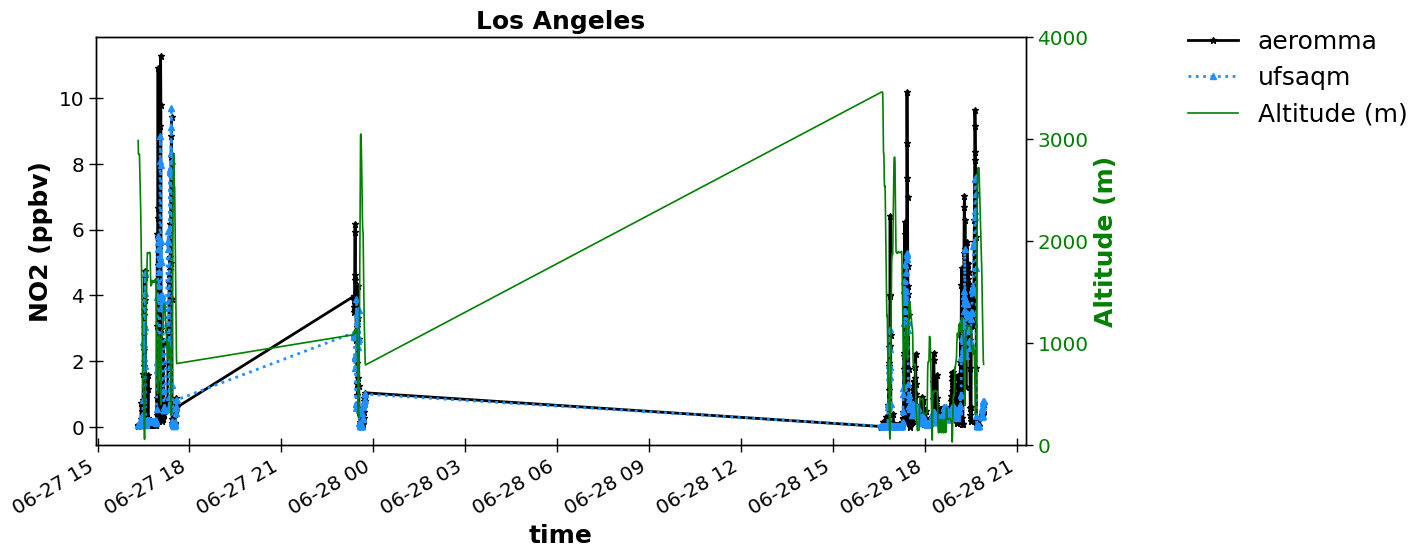

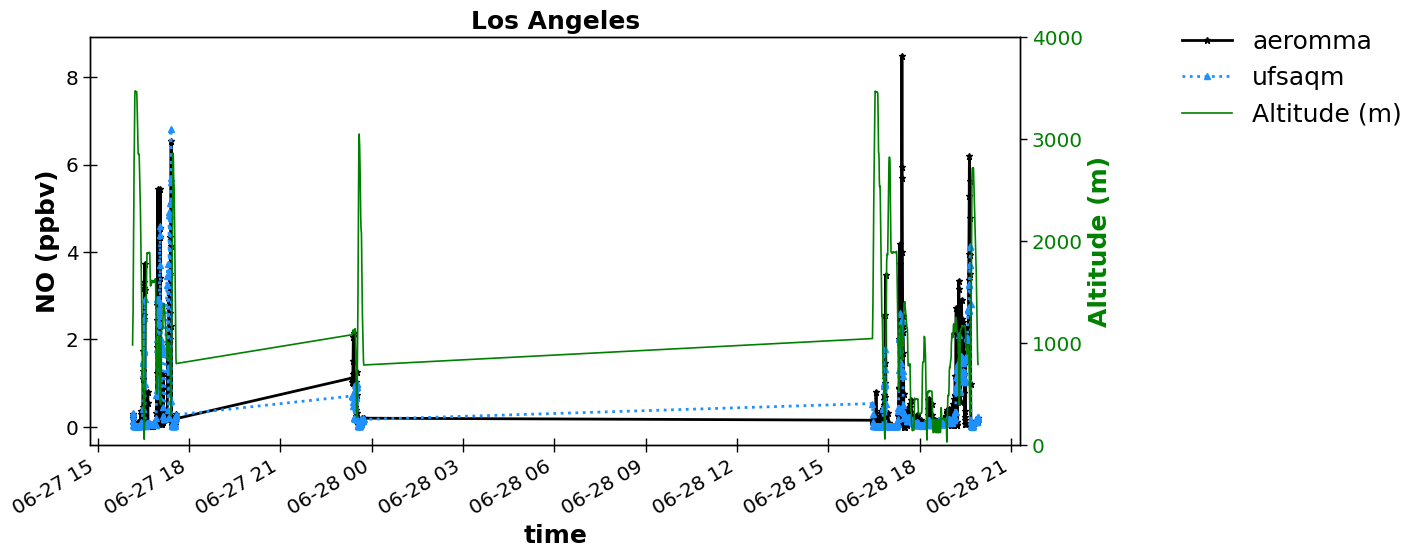

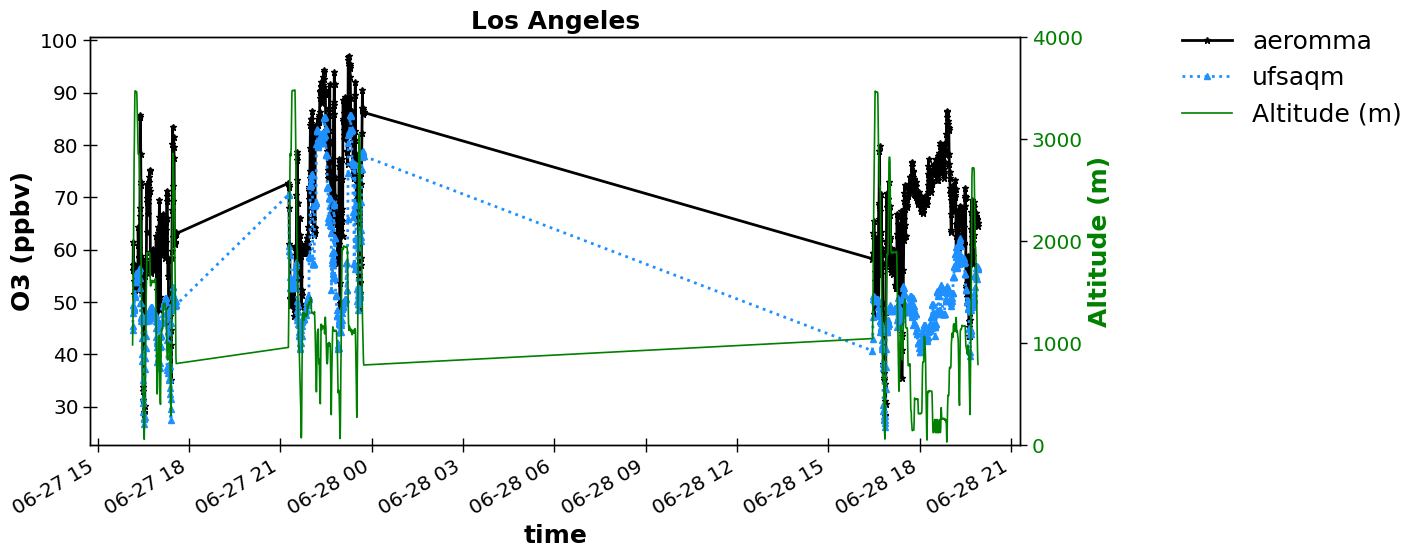

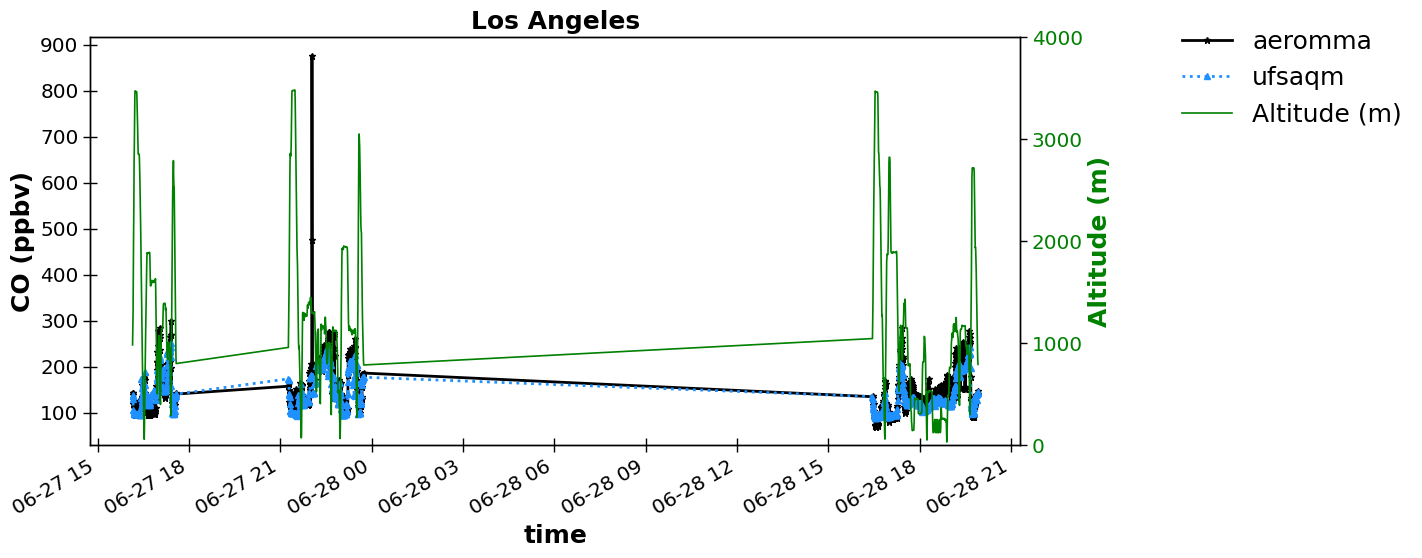

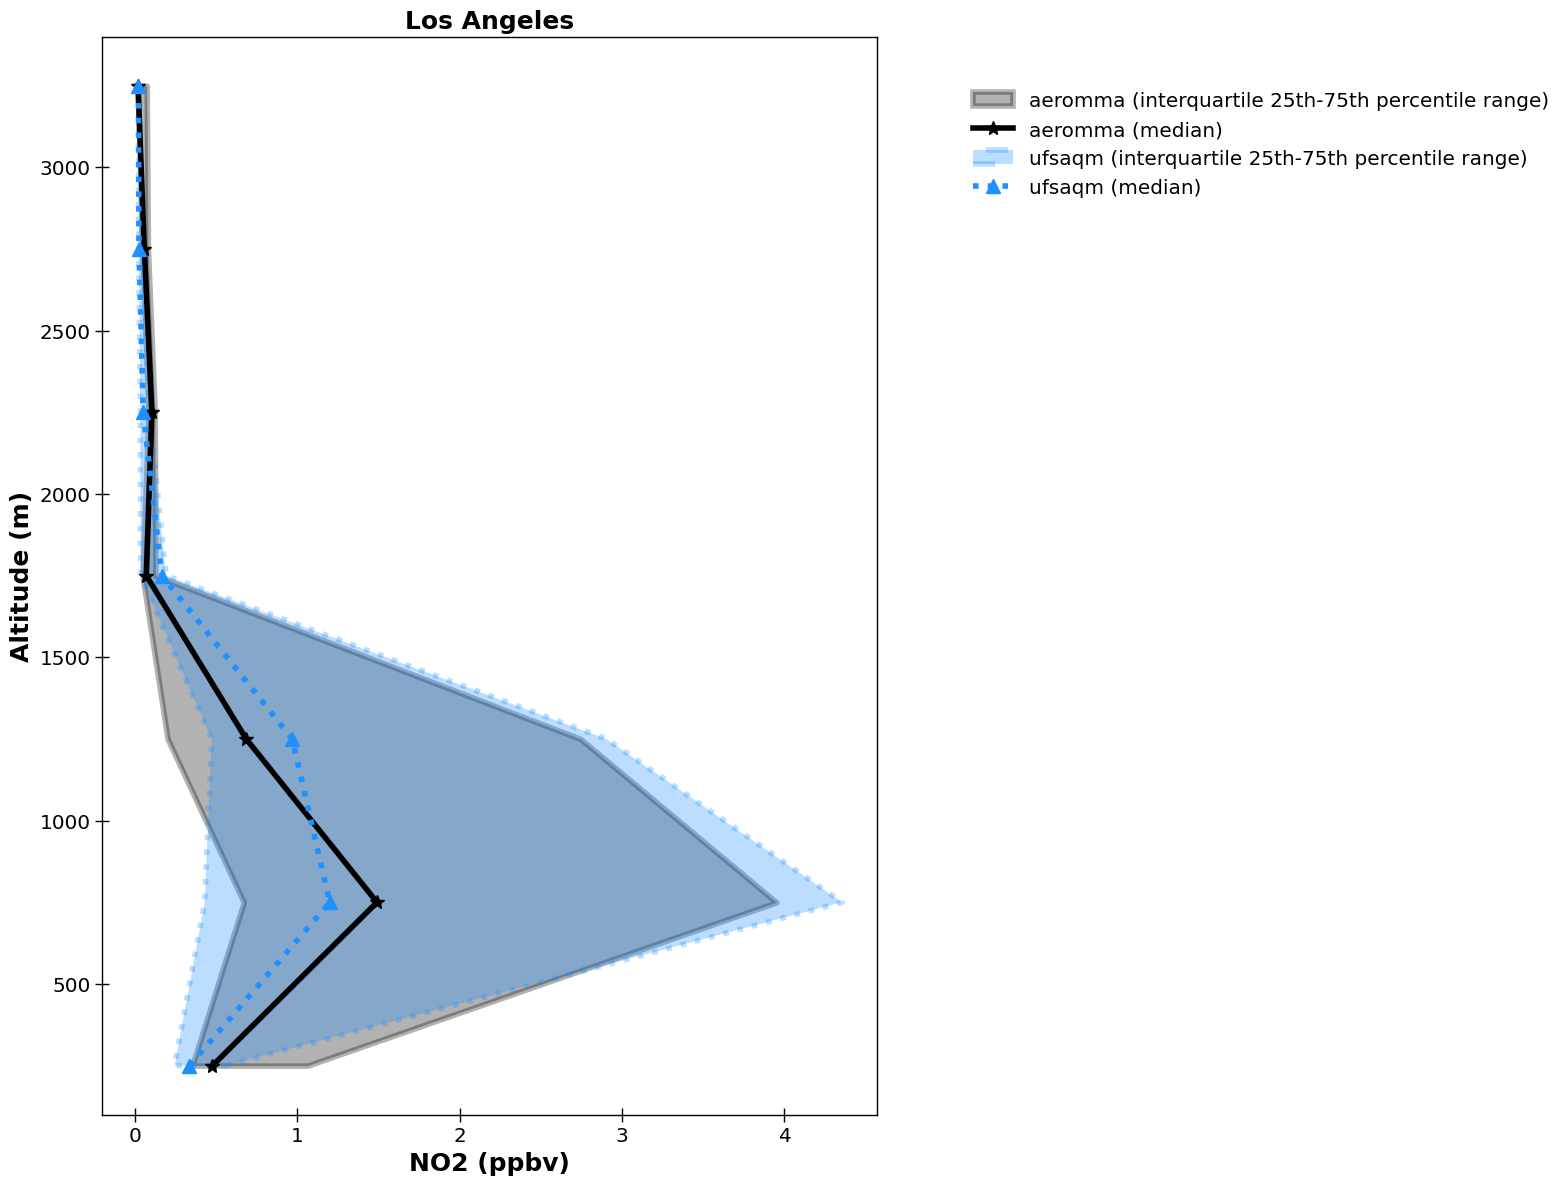

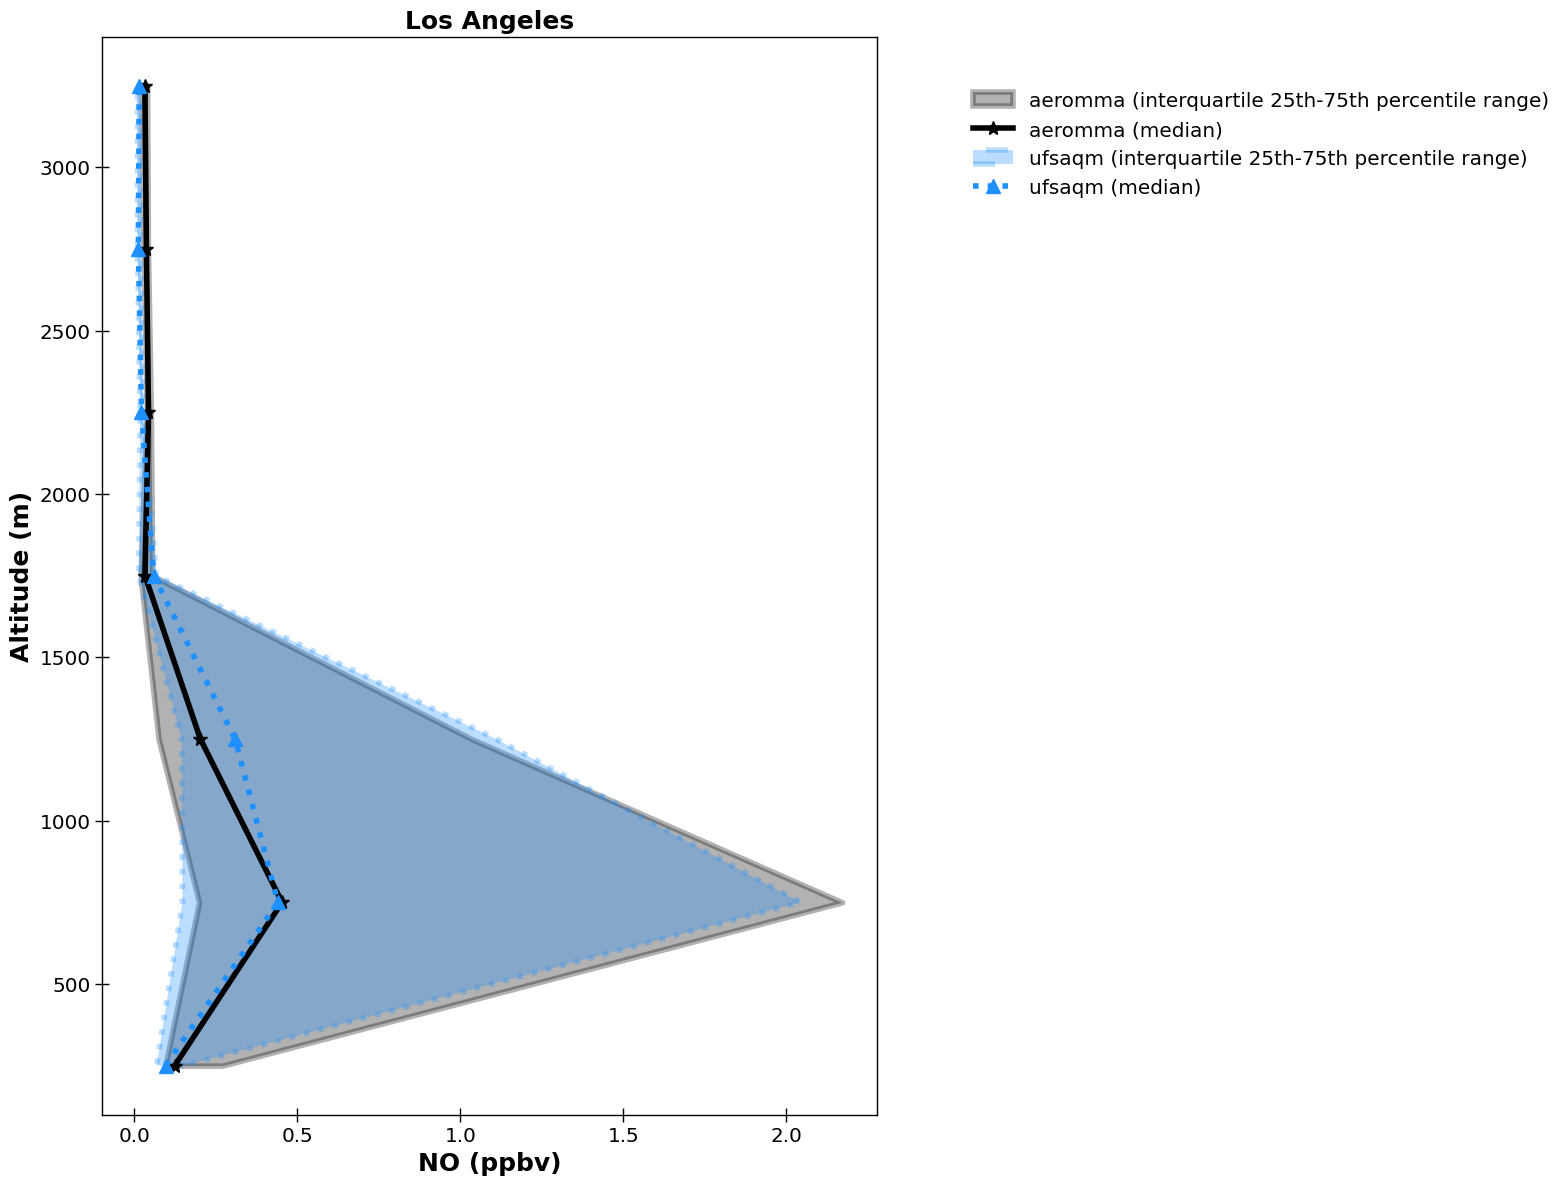

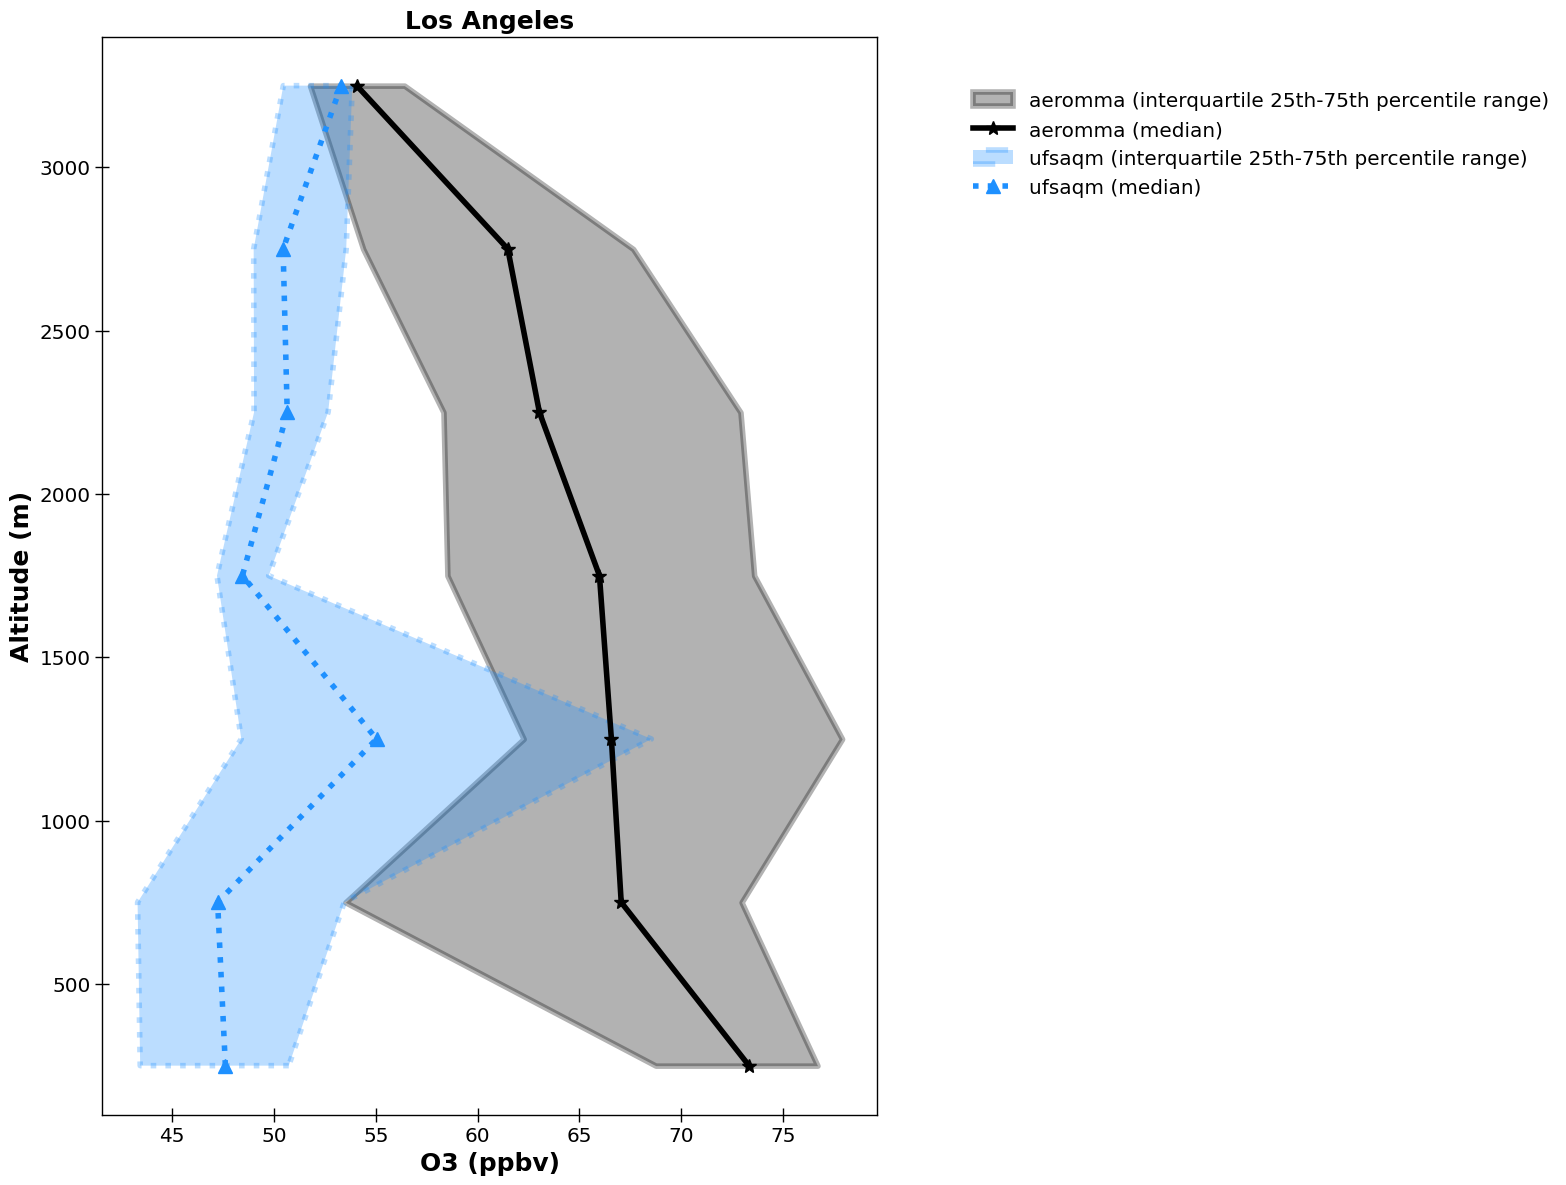

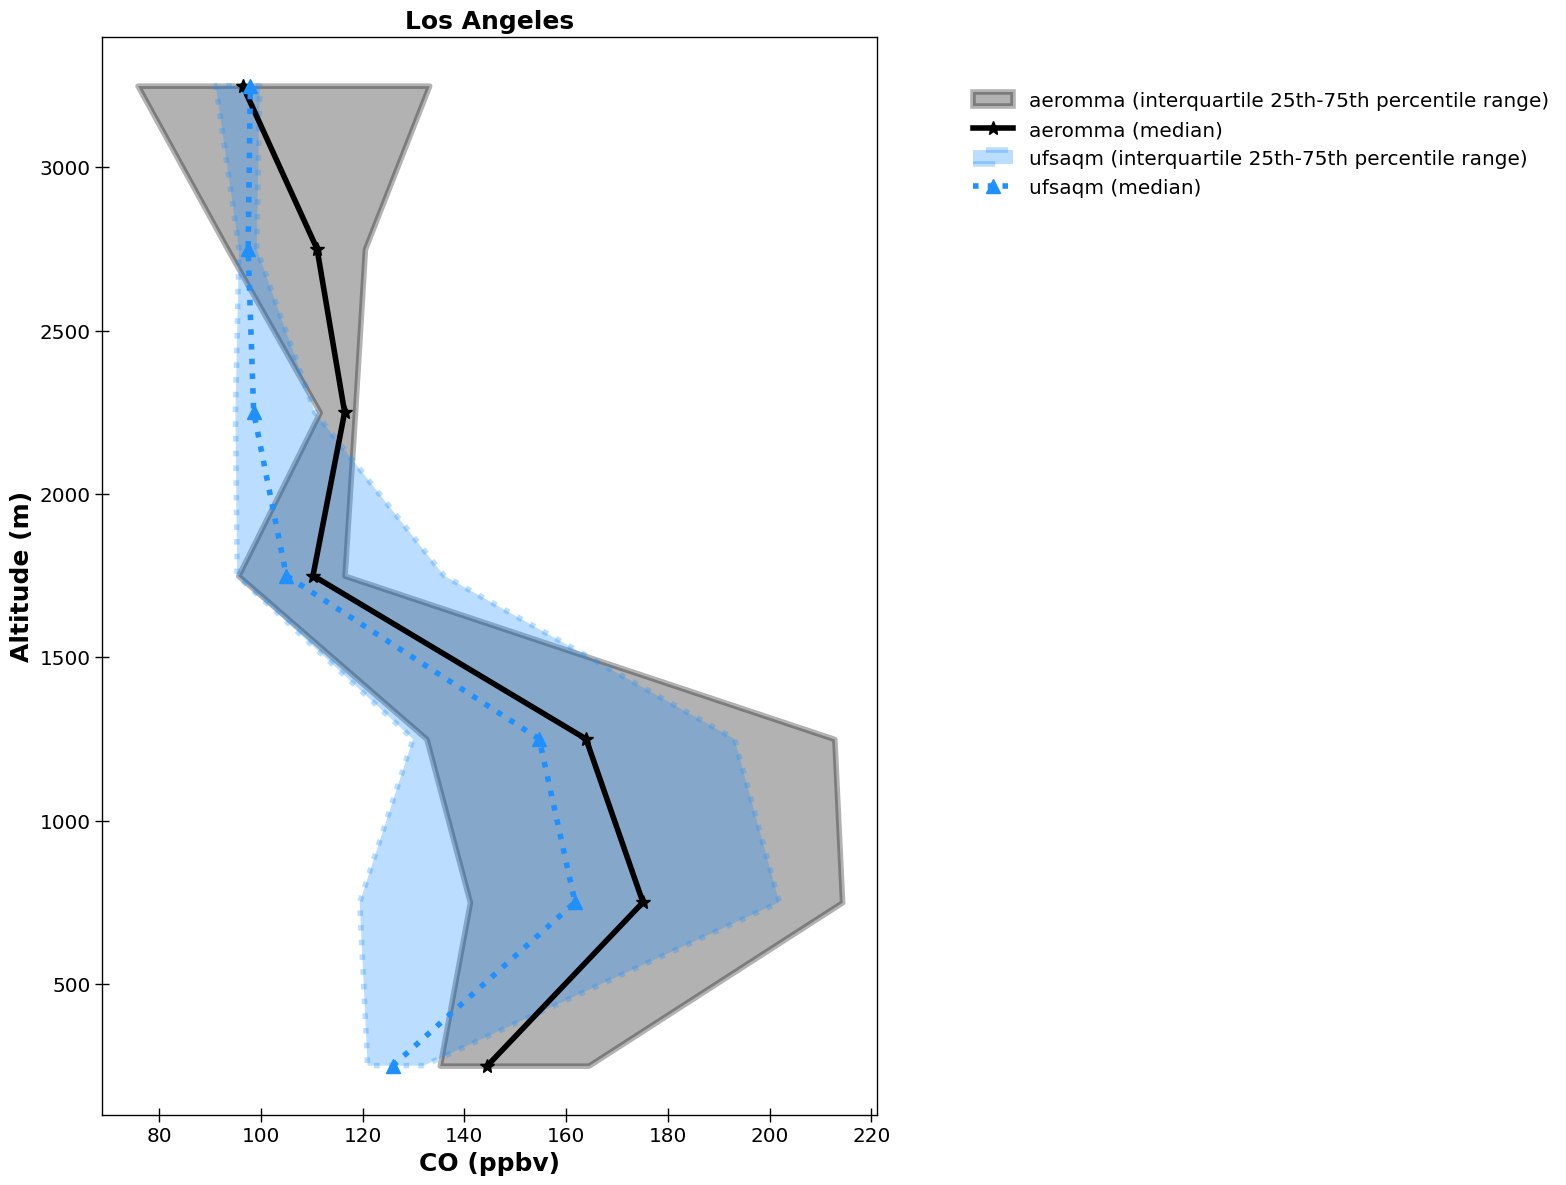

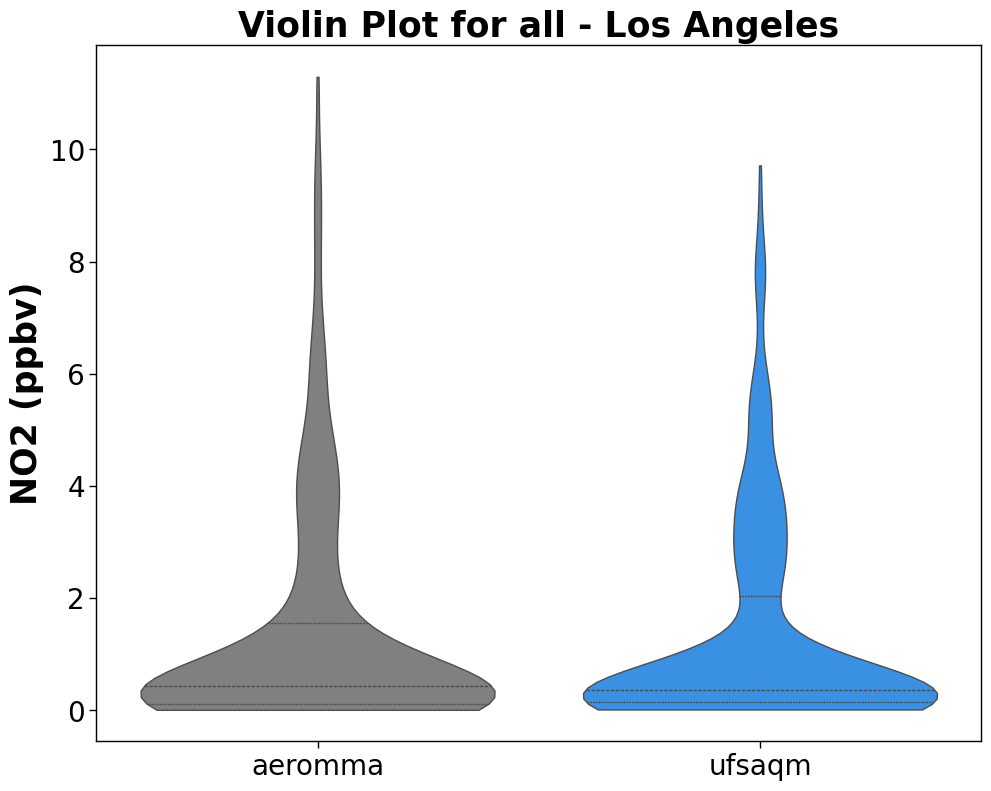

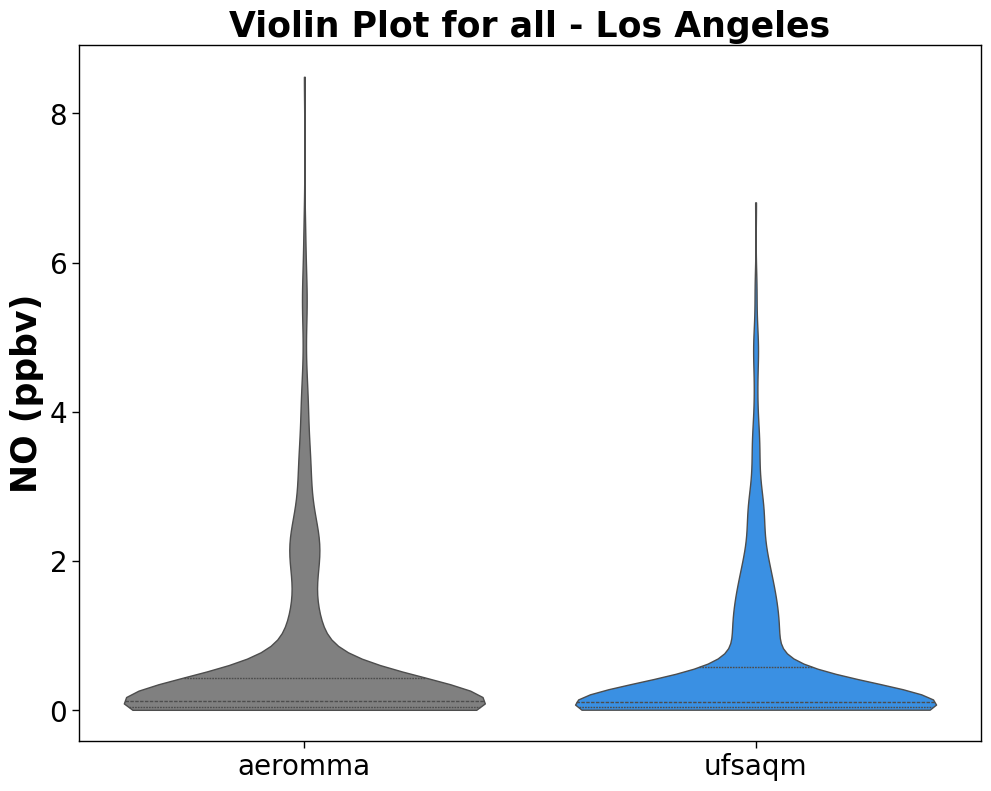

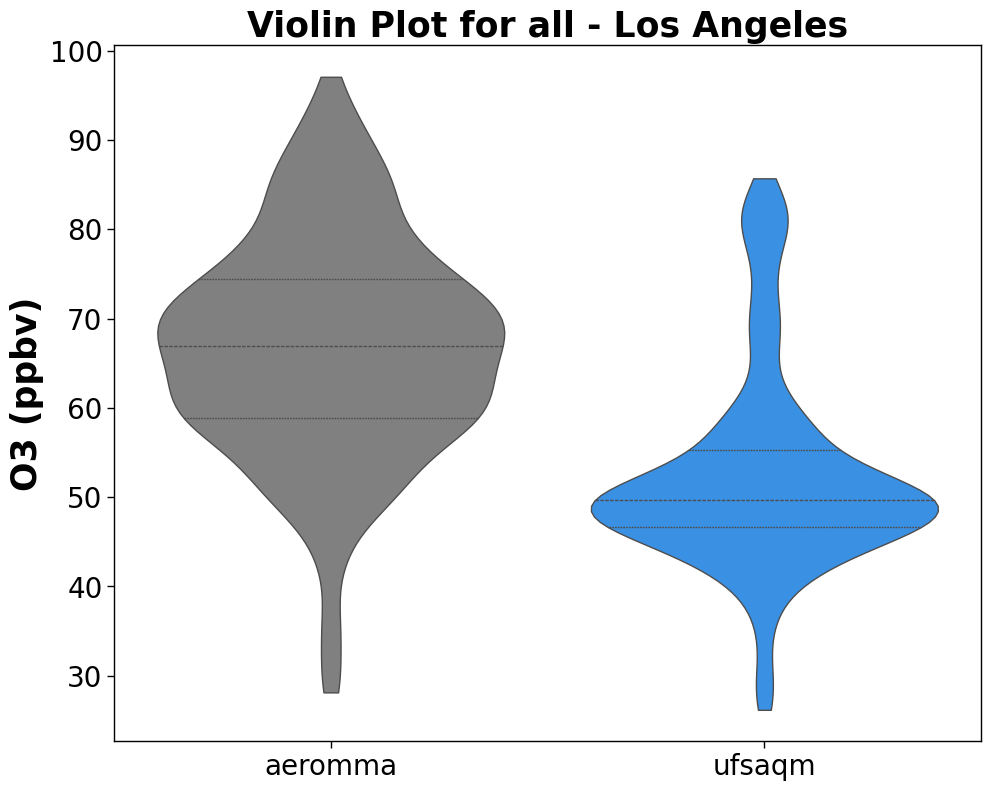

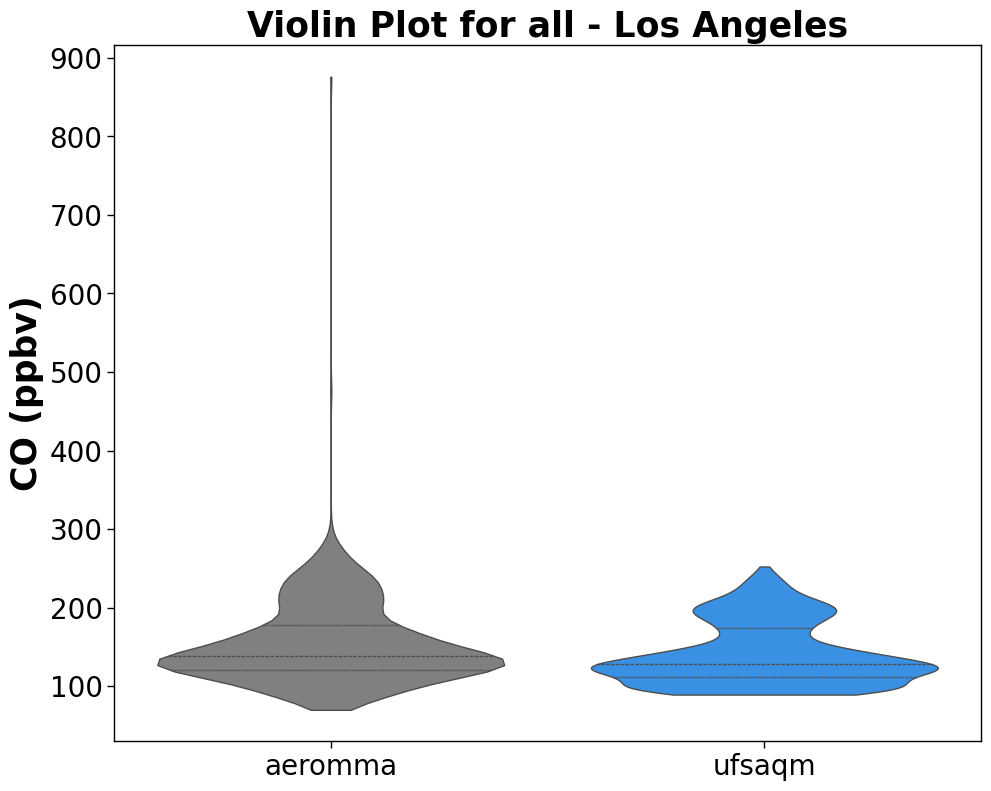

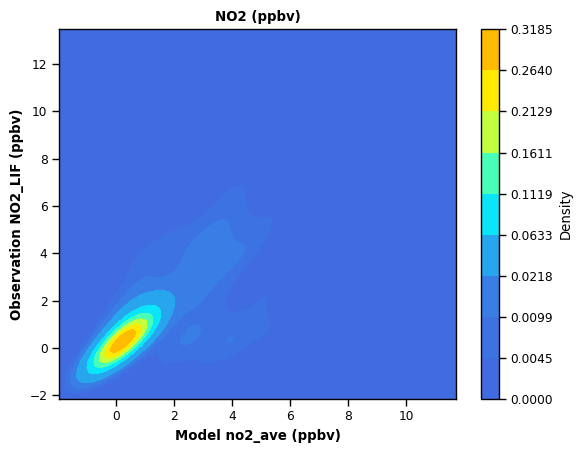

Value of fill after reading from scatter_density_config: True
Saving scatter density plot to /scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/processed/submit_plots/plot_grp4.scatter_density.NO_LIF.2023-06-27_00.2023-06-28_23.all.Los Angeles_aeromma_vs_ufsaqm.png...
Processing scatter density plot for model 'ufsaqm' and observation 'aeromma'...
Saving scatter density plot to /scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/processed/submit_plots/plot_grp4.scatter_density.NO_LIF.2023-06-27_00.2023-06-28_23.all.Los Angeles_aeromma_vs_ufsaqm.png...


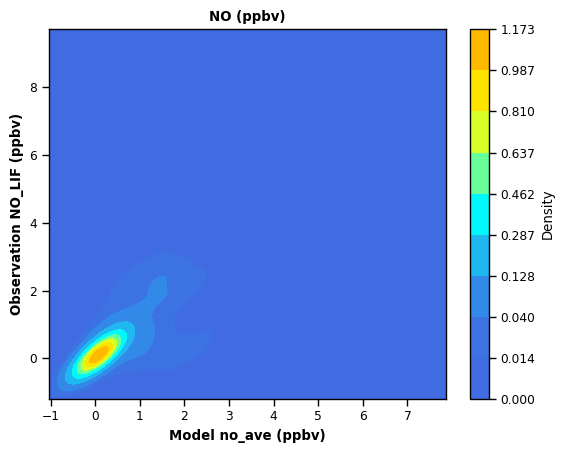

Value of fill after reading from scatter_density_config: True
Saving scatter density plot to /scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/processed/submit_plots/plot_grp4.scatter_density.O3_CL.2023-06-27_00.2023-06-28_23.all.Los Angeles_aeromma_vs_ufsaqm.png...
Processing scatter density plot for model 'ufsaqm' and observation 'aeromma'...
Saving scatter density plot to /scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/processed/submit_plots/plot_grp4.scatter_density.O3_CL.2023-06-27_00.2023-06-28_23.all.Los Angeles_aeromma_vs_ufsaqm.png...


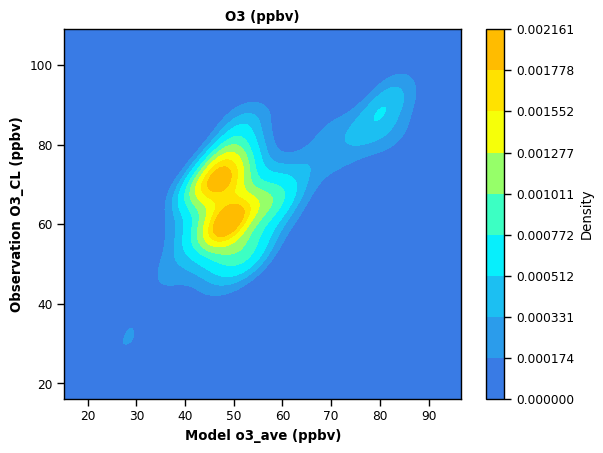

Value of fill after reading from scatter_density_config: True
Saving scatter density plot to /scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/processed/submit_plots/plot_grp4.scatter_density.CO_LGR.2023-06-27_00.2023-06-28_23.all.Los Angeles_aeromma_vs_ufsaqm.png...
Processing scatter density plot for model 'ufsaqm' and observation 'aeromma'...
Saving scatter density plot to /scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/processed/submit_plots/plot_grp4.scatter_density.CO_LGR.2023-06-27_00.2023-06-28_23.all.Los Angeles_aeromma_vs_ufsaqm.png...


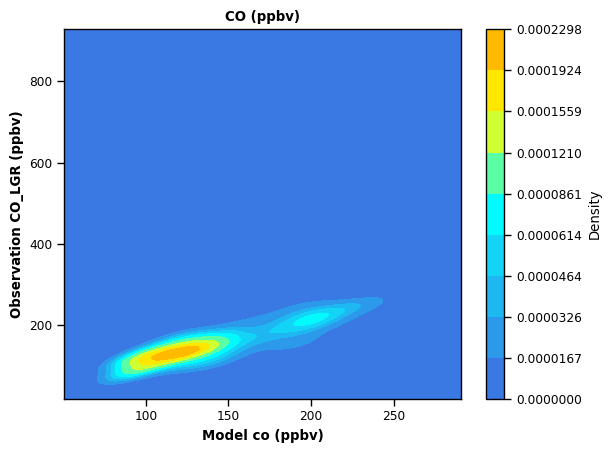

Reference std: 2.0721376629207224
Reference std: 1.156082601765845
Reference std: 12.41298170394838
Reference std: 53.78565889459322


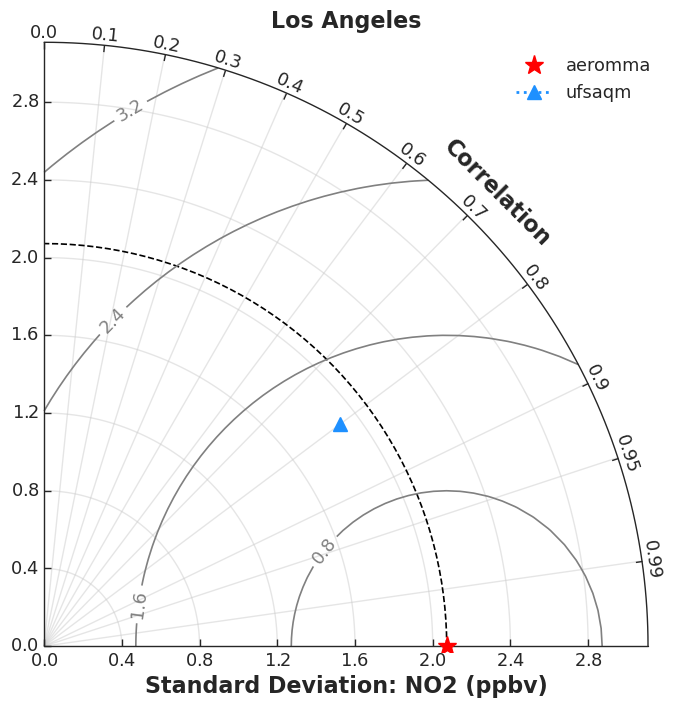

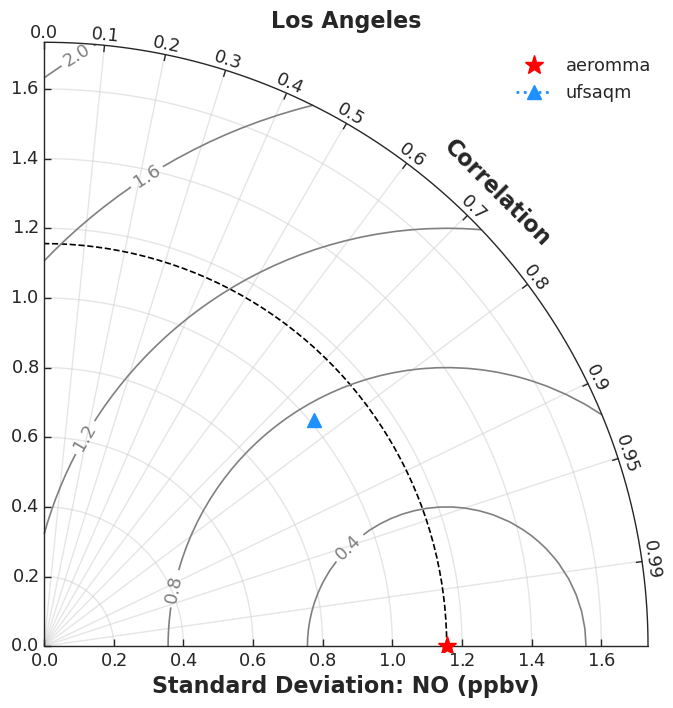

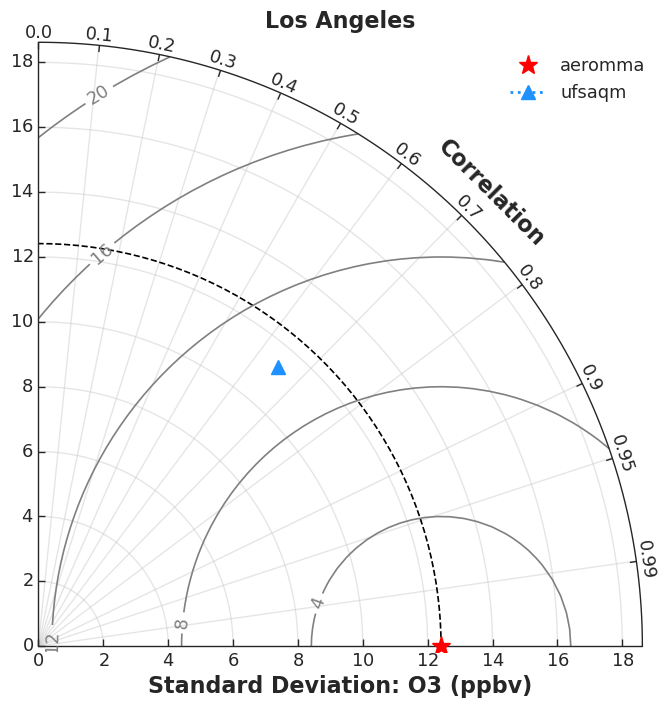

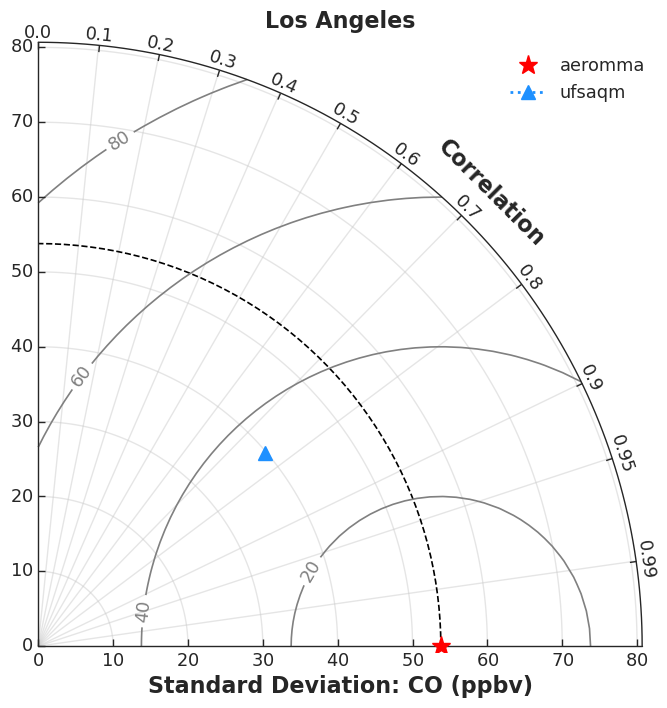

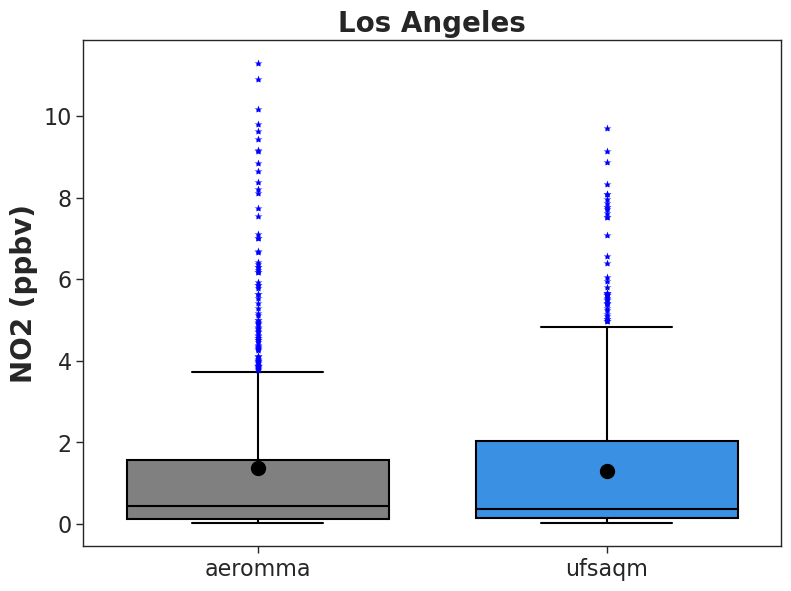

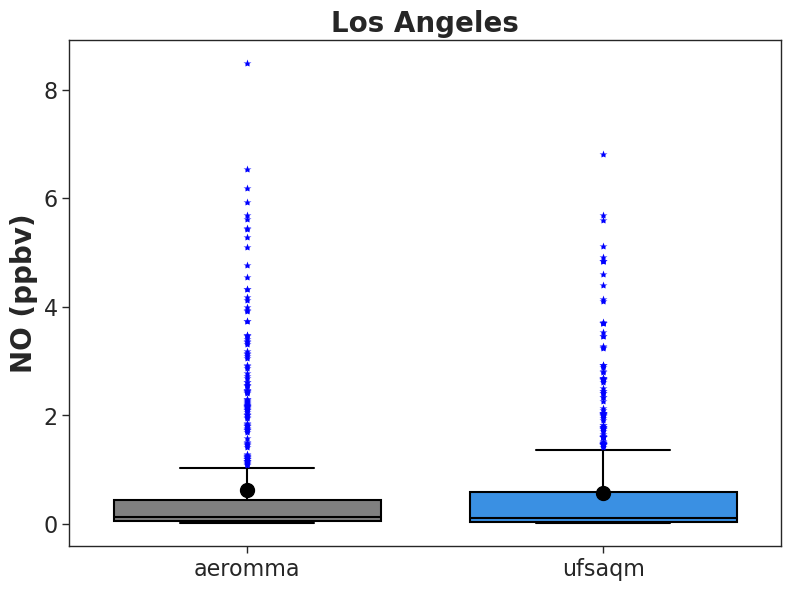

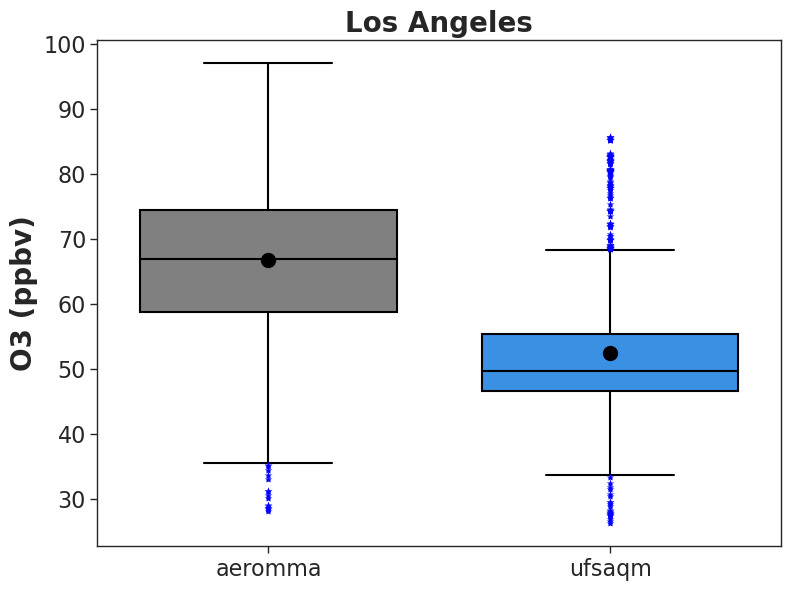

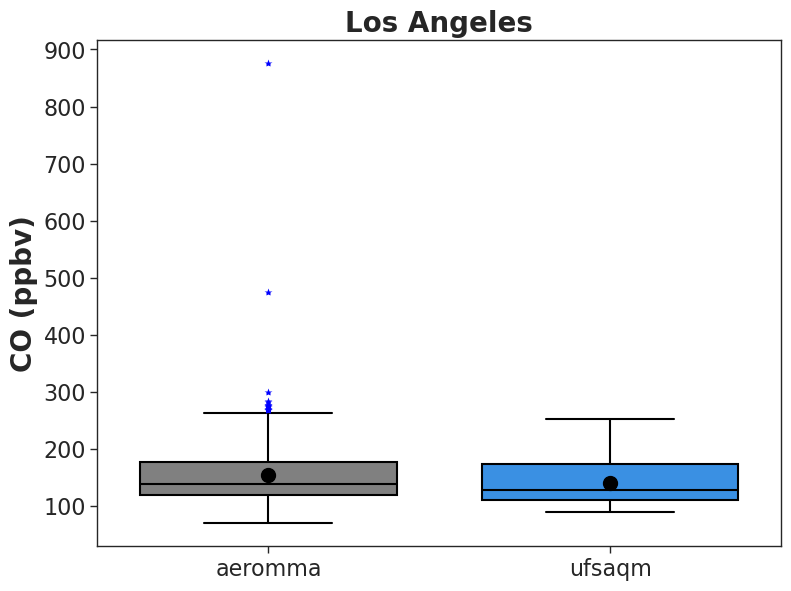

In [14]:
#And this generates all the plots.
an.plotting()